# Tyler's Capstone Scratchpad

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import acquire
import prepare
import explore
import tyler_explore
from datetime import datetime
import os

In [2]:
df = acquire.get_survey_data('survey.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
strings_df = prepare.prep_the_strings(df)
strings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    object        
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    object        
 5   family_history             957 non-null    object        
 6   treatment                  957 non-null    object        
 7   work_interfere             957 non-null    object        
 8   no_employees               957 non-null    object        
 9   remote_work                957 non-null    object        
 10  tech_company               957 non-null    object        
 11  benefits                   957 non-null    object        
 12  care_op

In [5]:
encode_df = prepare.prep_encode(strings_df)
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    int64         
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    int64         
 5   family_history             957 non-null    int64         
 6   treatment                  957 non-null    int64         
 7   work_interfere             957 non-null    int64         
 8   company_size               957 non-null    int64         
 9   remote_work                957 non-null    int64         
 10  tech_company               957 non-null    int64         
 11  benefits                   957 non-null    int64         
 12  care_op

## Data Exploration

### Boolean Variables:
- 'self_employed'
- 'family_history'
- 'remote_work'
- 'tech_company'
- 'obs_consequence'

In [6]:
# first let's split the data...

train, validate, test = explore.train_validate_test_split(encode_df, 'work_interfere')

In [7]:
train.shape, validate.shape, test.shape

((535, 25), (230, 25), (192, 25))

In [8]:
cat_vars, quant_vars = explore.cat_vs_quant(train)

In [9]:
cat_vars

['gender',
 'self_employed',
 'family_history',
 'treatment',
 'company_size',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [10]:
quant_vars

['age']

In [11]:
train.company_size.nunique()

6

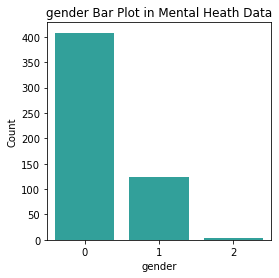

   gender  Count  Percent
0       0    408    76.26
1       1    124    23.18
2       2      3     0.56
_________________________________________________________________


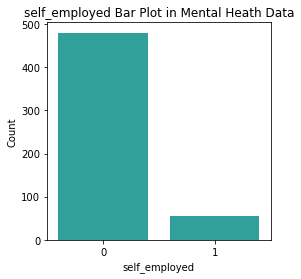

   self_employed  Count  Percent
0              0    480    89.72
1              1     55    10.28
_________________________________________________________________


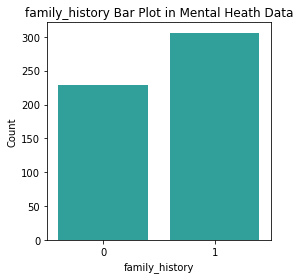

   family_history  Count  Percent
0               1    306     57.2
1               0    229     42.8
_________________________________________________________________


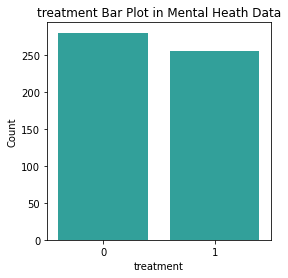

   treatment  Count  Percent
1          0    280    52.34
0          1    255    47.66
_________________________________________________________________


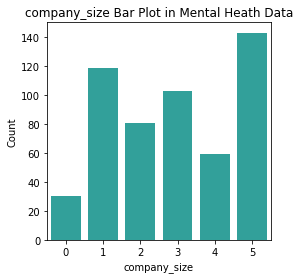

   company_size  Count  Percent
5             5    143    26.73
2             1    119    22.24
1             3    103    19.25
3             2     81    15.14
0             4     59    11.03
4             0     30     5.61
_________________________________________________________________


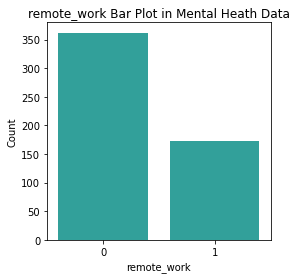

   remote_work  Count  Percent
0            0    362    67.66
1            1    173    32.34
_________________________________________________________________


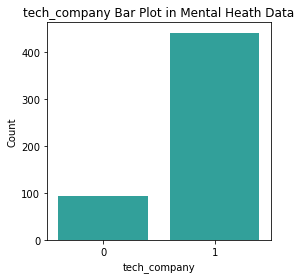

   tech_company  Count  Percent
1             1    441    82.43
0             0     94    17.57
_________________________________________________________________


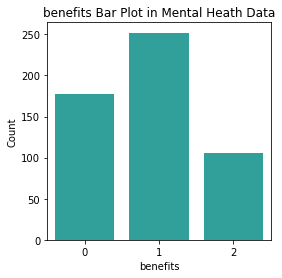

   benefits  Count  Percent
1         1    252    47.10
2         0    177    33.08
0         2    106    19.81
_________________________________________________________________


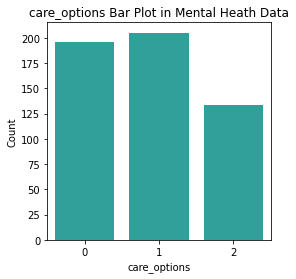

   care_options  Count  Percent
1             1    205    38.32
0             0    196    36.64
2             2    134    25.05
_________________________________________________________________


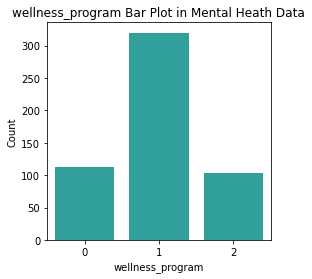

   wellness_program  Count  Percent
0                 1    320    59.81
1                 0    112    20.93
2                 2    103    19.25
_________________________________________________________________


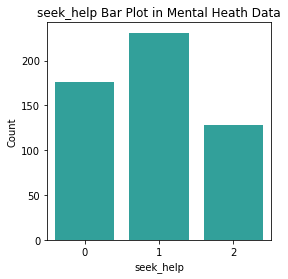

   seek_help  Count  Percent
0          1    231    43.18
2          0    176    32.90
1          2    128    23.93
_________________________________________________________________


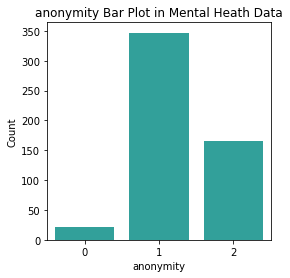

   anonymity  Count  Percent
2          1    347    64.86
1          2    166    31.03
0          0     22     4.11
_________________________________________________________________


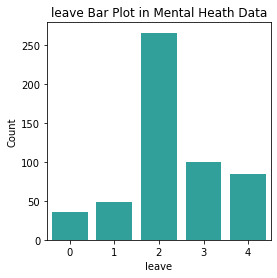

   leave  Count  Percent
2      2    266    49.72
3      3    100    18.69
4      4     84    15.70
1      1     49     9.16
0      0     36     6.73
_________________________________________________________________


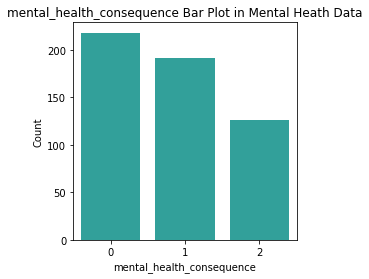

   mental_health_consequence  Count  Percent
0                          0    218    40.75
2                          1    191    35.70
1                          2    126    23.55
_________________________________________________________________


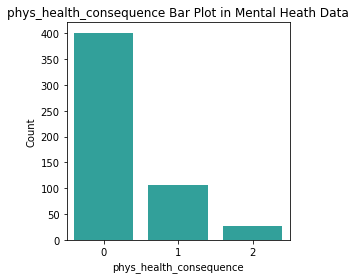

   phys_health_consequence  Count  Percent
0                        0    401    74.95
2                        1    107    20.00
1                        2     27     5.05
_________________________________________________________________


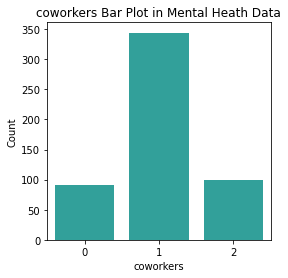

   coworkers  Count  Percent
2          1    344    64.30
0          2    100    18.69
1          0     91    17.01
_________________________________________________________________


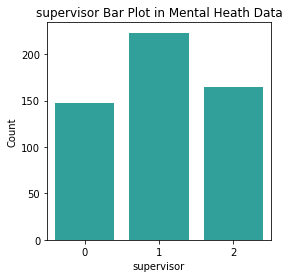

   supervisor  Count  Percent
1           1    223    41.68
0           2    165    30.84
2           0    147    27.48
_________________________________________________________________


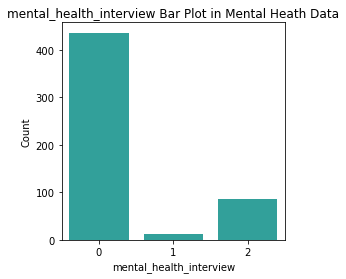

   mental_health_interview  Count  Percent
0                        0    436    81.50
2                        2     87    16.26
1                        1     12     2.24
_________________________________________________________________


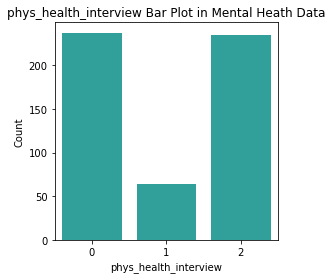

   phys_health_interview  Count  Percent
2                      0    237    44.30
0                      2    234    43.74
1                      1     64    11.96
_________________________________________________________________


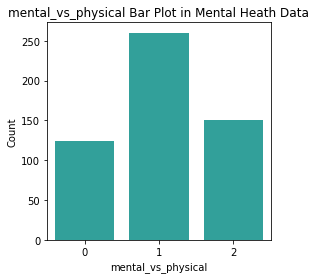

   mental_vs_physical  Count  Percent
2                   1    260    48.60
1                   2    151    28.22
0                   0    124    23.18
_________________________________________________________________


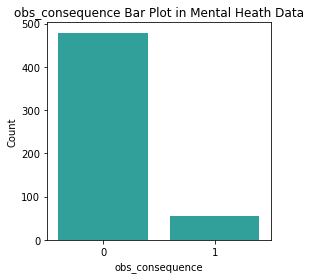

   obs_consequence  Count  Percent
0                0    479    89.53
1                1     56    10.47
_________________________________________________________________


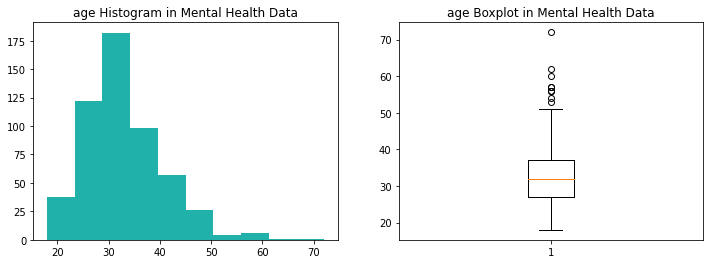

count    535.000000
mean      32.884112
std        7.483417
min       18.000000
25%       27.000000
50%       32.000000
75%       37.000000
max       72.000000
Name: age, dtype: float64


In [12]:
explore.explore_univariate(train)

#### Univariate Exploration - Key Findings, Takeaways, and Next Steps:
- `gender` is very unbalanced, with approx 75% female, 25% male, and less than 1% other.
- `self_employed` is also very unbalanced, with only 10% self-employed.
- `family_history` is 40% no history, 60% history. Interesting to see so many showing a history of mental-illness...(could this be a potential driver???).
- `treatment` is almost evenly split and at first glance appears to not be a driver.
- `work_interfere` our target variable is split 60-40, will need to explore over/under-sampling methods to improve model accuracy.
- `company_size` has multiple peaks and valleys. It would be nice if the data wasn't already binned, so we could possibly bin differently. Also, clustering might play a role in dealing with company size. It appears there will be a relationship with our target, but what it is, is currently unclear.
- `remote_work` is roughly 70-30, with most people working in office. Becasue this data is pre-covid, it would be really nice to gather additional data during/post-covid to see what changes have occurred.
- `tech_company` represents 80% of our observations, with approx 20% not working in tech. Unclear at this time if we have enough data to make a good comparison between the two groups.
- `benefits` is roughly normally distributed with about half of all observations receiving benefits, one-third not receiving any, and one-fifth unsure if they are available. Really interested to learn more about the 'unsure' group. How do they not know? Are they going to stand out compared to the other two groups?
- `care_options` are almost uniform in distribution. 'Yes' and 'No' each receive a little over one-third of all responses, and 'Don't know' receives just under one-third. Again, we are very interested in the 'Don't know' group. Does it not matter if care is available because they do not have mental health issues? Or, is this a possible sign of a group not receiving preventative measures that could have a potentially large impact?
- `wellness_program` is normally distributed with 60% having a wellness program, and 20% each either not having one, or unsure. Would love to see how this relates to tech vs non-tech jobs, and again, if 'Don't know' is a driver, or just noise.
- `seek_help` is roughly normally distributed with 40% receiving help/resources from their company, and 30% not receiving any, and 20% unsure.
- `anonymity` shows most believe they would be able to keep their issues private if they received helped/seeked treatment for a mental issue. Less than 5% felt they could not stay anonymous.
- `leave` is roughly normally distributed, however most responses are unsure how difficult it would be to take leave due to a mental health issue.
- `mental_health_consequence` is skewed to the right, with 40% showing no consequences, 30% fearing consequences, and 20% unsure.
- `phys_health_consequence` shows a stark contrast to mental...75% have no fear, 20% worry about consequences, and 5% are unsure. We are really interested to see what leads to these differences.
- `coworkers` are roughly normally distributed with 60% feeling comfortable speaking with coworkers, and 20% uncomfortable and 20% unsure.
- `supervisor` shows another stark contrast where 30% are uncomortable, 40% comfortable, and 30% unsure.
- `mental_health_interview` shows that the overwhelming majority do not feel comfortable bringing up mental health issues in an interview.
- `phys_health_interview` shows that roughly half as many people would be afraid to bring up a physical health issue as a mental one.
- `mental_vs_physical` is roughly normally distributed, with most (40%) feeling like their employer takes mental health as seriously as physical health. This is really interesting considering the other responses. (If your boss takes mental health as seriously as pysical health, why are you less likely to bring up a mental issue?)
- `obs_consequence` shows 90% of observations have not heard of any consequences from coworkers sharing mental health issues.
- `age` is roughly normally distributed around a mean of 32, but has a tail on the upper end. Will be interested interesting to see if we need to bin this data, and how it relates to other variables.

- `Next Steps` Definitely want to see if the 'unsure' groups drive 'work_interfere' or if they are just noise. We will also need to look into over/under-sampling methods to normalize our data a little more, potentially.

#### Bivariate Exploration

gender 
_____________________

  variable       chi2   p-value  degrees of freedom
0   gender  13.210684  0.001353                   2

observed:
 work_interfere    0    1  All
gender                       
0               167  241  408
1                30   94  124
2                 0    3    3
All             197  338  535

expected:
 [[150.23551402 257.76448598]
 [ 45.65981308  78.34018692]
 [  1.1046729    1.8953271 ]]


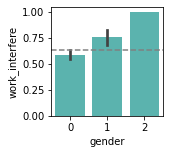


_____________________

self_employed 
_____________________

        variable      chi2   p-value  degrees of freedom
0  self_employed  0.005343  0.941729                   1

observed:
 work_interfere    0    1  All
self_employed                
0               176  304  480
1                21   34   55
All             197  338  535

expected:
 [[176.74766355 303.25233645]
 [ 20.25233645  34.74766355]]


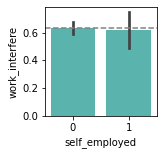


_____________________

family_history 
_____________________

         variable       chi2       p-value  degrees of freedom
0  family_history  65.937187  4.655250e-16                   1

observed:
 work_interfere    0    1  All
family_history               
0               158  148  306
1                39  190  229
All             197  338  535

expected:
 [[112.67663551 193.32336449]
 [ 84.32336449 144.67663551]]


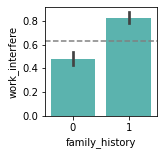


_____________________

treatment 
_____________________

    variable        chi2       p-value  degrees of freedom
0  treatment  258.596955  3.470161e-58                   1

observed:
 work_interfere    0    1  All
treatment                    
0               184   71  255
1                13  267  280
All             197  338  535

expected:
 [[ 93.89719626 161.10280374]
 [103.10280374 176.89719626]]


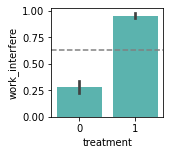


_____________________

company_size 
_____________________

       variable      chi2   p-value  degrees of freedom
0  company_size  9.221703  0.100541                   5

observed:
 work_interfere    0    1  All
company_size                 
0                18   41   59
1                34   69  103
2                45   74  119
3                27   54   81
4                18   12   30
5                55   88  143
All             197  338  535

expected:
 [[21.72523364 37.27476636]
 [37.9271028  65.0728972 ]
 [43.81869159 75.18130841]
 [29.82616822 51.17383178]
 [11.04672897 18.95327103]
 [52.65607477 90.34392523]]


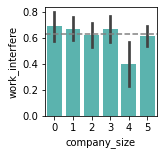


_____________________

remote_work 
_____________________

      variable      chi2   p-value  degrees of freedom
0  remote_work  0.178187  0.672936                   1

observed:
 work_interfere    0    1  All
remote_work                  
0               136  226  362
1                61  112  173
All             197  338  535

expected:
 [[133.29719626 228.70280374]
 [ 63.70280374 109.29719626]]


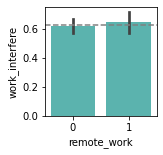


_____________________

tech_company 
_____________________

       variable      chi2   p-value  degrees of freedom
0  tech_company  1.450367  0.228469                   1

observed:
 work_interfere    0    1  All
tech_company                 
0                29   65   94
1               168  273  441
All             197  338  535

expected:
 [[ 34.61308411  59.38691589]
 [162.38691589 278.61308411]]


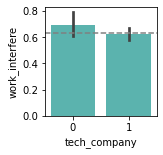


_____________________

benefits 
_____________________

   variable       chi2   p-value  degrees of freedom
0  benefits  13.583282  0.001123                   2

observed:
 work_interfere    0    1  All
benefits                     
0                37   69  106
1                76  176  252
2                84   93  177
All             197  338  535

expected:
 [[ 39.0317757   66.9682243 ]
 [ 92.79252336 159.20747664]
 [ 65.17570093 111.82429907]]


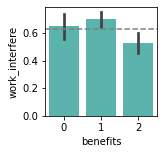


_____________________

care_options 
_____________________

       variable       chi2  p-value  degrees of freedom
0  care_options  16.158273  0.00031                   2

observed:
 work_interfere    0    1  All
care_options                 
0                82  114  196
1                54  151  205
2                61   73  134
All             197  338  535

expected:
 [[ 72.17196262 123.82803738]
 [ 75.48598131 129.51401869]
 [ 49.34205607  84.65794393]]


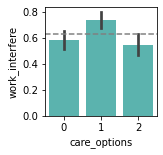


_____________________

wellness_program 
_____________________

           variable      chi2   p-value  degrees of freedom
0  wellness_program  6.695231  0.035168                   2

observed:
 work_interfere      0    1  All
wellness_program               
0                 107  213  320
1                  41   71  112
2                  49   54  103
All               197  338  535

expected:
 [[117.8317757 202.1682243]
 [ 41.2411215  70.7588785]
 [ 37.9271028  65.0728972]]


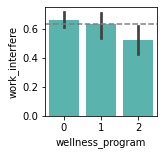


_____________________

seek_help 
_____________________

    variable      chi2   p-value  degrees of freedom
0  seek_help  4.107803  0.128234                   2

observed:
 work_interfere    0    1  All
seek_help                    
0                76  155  231
1                46   82  128
2                75  101  176
All             197  338  535

expected:
 [[ 85.05981308 145.94018692]
 [ 47.13271028  80.86728972]
 [ 64.80747664 111.19252336]]


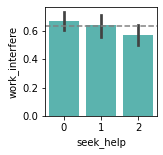


_____________________

anonymity 
_____________________

    variable      chi2   p-value  degrees of freedom
0  anonymity  0.710995  0.700825                   2

observed:
 work_interfere    0    1  All
anonymity                    
0                 7   15   22
1                58  108  166
2               132  215  347
All             197  338  535

expected:
 [[  8.10093458  13.89906542]
 [ 61.12523364 104.87476636]
 [127.77383178 219.22616822]]


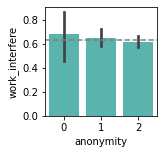


_____________________

leave 
_____________________

  variable       chi2   p-value  degrees of freedom
0    leave  19.494145  0.000628                   4

observed:
 work_interfere    0    1  All
leave                        
0                 5   31   36
1                11   38   49
2               115  151  266
3                31   69  100
4                35   49   84
All             197  338  535

expected:
 [[ 13.25607477  22.74392523]
 [ 18.04299065  30.95700935]
 [ 97.94766355 168.05233645]
 [ 36.82242991  63.17757009]
 [ 30.93084112  53.06915888]]


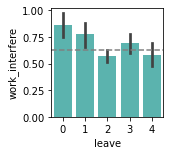


_____________________

mental_health_consequence 
_____________________

                    variable       chi2   p-value  degrees of freedom
0  mental_health_consequence  15.407893  0.000451                   2

observed:
 work_interfere               0    1  All
mental_health_consequence               
0                           98  120  218
1                           30   96  126
2                           69  122  191
All                        197  338  535

expected:
 [[ 80.2728972  137.7271028 ]
 [ 46.39626168  79.60373832]
 [ 70.33084112 120.66915888]]


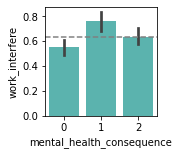


_____________________

phys_health_consequence 
_____________________

                  variable      chi2   p-value  degrees of freedom
0  phys_health_consequence  7.734284  0.020918                   2

observed:
 work_interfere             0    1  All
phys_health_consequence               
0                        159  242  401
1                         11   16   27
2                         27   80  107
All                      197  338  535

expected:
 [[147.65794393 253.34205607]
 [  9.94205607  17.05794393]
 [ 39.4         67.6       ]]


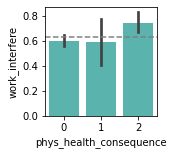


_____________________

coworkers 
_____________________

    variable      chi2   p-value  degrees of freedom
0  coworkers  0.176314  0.915617                   2

observed:
 work_interfere    0    1  All
coworkers                    
0                35   65  100
1                34   57   91
2               128  216  344
All             197  338  535

expected:
 [[ 36.82242991  63.17757009]
 [ 33.50841121  57.49158879]
 [126.66915888 217.33084112]]


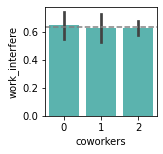


_____________________

supervisor 
_____________________

     variable       chi2  p-value  degrees of freedom
0  supervisor  15.597642  0.00041                   2

observed:
 work_interfere    0    1  All
supervisor                   
0                57  108  165
1               102  121  223
2                38  109  147
All             197  338  535

expected:
 [[ 60.75700935 104.24299065]
 [ 82.11401869 140.88598131]
 [ 54.12897196  92.87102804]]


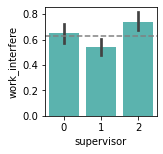


_____________________

mental_health_interview 
_____________________

                  variable       chi2   p-value  degrees of freedom
0  mental_health_interview  18.506319  0.000096                   2

observed:
 work_interfere             0    1  All
mental_health_interview               
0                        142  294  436
1                          6    6   12
2                         49   38   87
All                      197  338  535

expected:
 [[160.54579439 275.45420561]
 [  4.41869159   7.58130841]
 [ 32.03551402  54.96448598]]


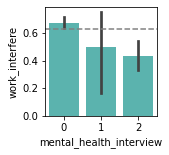


_____________________

phys_health_interview 
_____________________

                variable     chi2   p-value  degrees of freedom
0  phys_health_interview  0.10079  0.950854                   2

observed:
 work_interfere           0    1  All
phys_health_interview               
0                       85  149  234
1                       23   41   64
2                       89  148  237
All                    197  338  535

expected:
 [[ 86.16448598 147.83551402]
 [ 23.56635514  40.43364486]
 [ 87.26915888 149.73084112]]


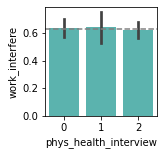


_____________________

mental_vs_physical 
_____________________

             variable      chi2   p-value  degrees of freedom
0  mental_vs_physical  7.571748  0.022689                   2

observed:
 work_interfere        0    1  All
mental_vs_physical               
0                    33   91  124
1                    63   88  151
2                   101  159  260
All                 197  338  535

expected:
 [[ 45.65981308  78.34018692]
 [ 55.60186916  95.39813084]
 [ 95.73831776 164.26168224]]


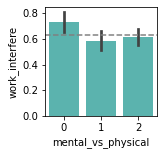


_____________________

obs_consequence 
_____________________

          variable      chi2   p-value  degrees of freedom
0  obs_consequence  4.346936  0.037076                   1

observed:
 work_interfere     0    1  All
obs_consequence               
0                184  295  479
1                 13   43   56
All              197  338  535

expected:
 [[176.37943925 302.62056075]
 [ 20.62056075  35.37943925]]


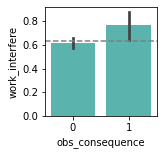


_____________________

age 
____________________



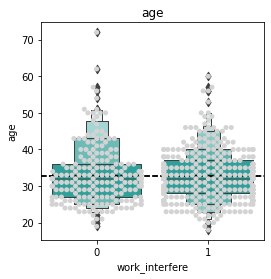

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________



In [13]:
metric_df = tyler_explore.explore_bivariate(train, 'work_interfere')

In [15]:
test = tyler_explore.bivariate_metrics(train, 'work_interfere')

In [17]:
test.reset_index(drop=True)

,variable,chi2,p-value,degrees of freedom
0,family_history,66.0,0.0000,1.0
1,treatment,259.0,0.0000,1.0
2,mental_health_interview,19.0,0.0001,2.0
3,care_options,16.0,0.0003,2.0
4,supervisor,16.0,0.0004,2.0
5,mental_health_consequence,15.0,0.0005,2.0
6,leave,19.0,0.0006,4.0
7,benefits,14.0,0.0011,2.0
8,gender,13.0,0.0014,2.0
9,phys_health_consequence,8.0,0.0209,2.0


#### Bivariate Exploration - Key Findings, Takeaways, and Next Steps:
**Possible Strong Drivers (p-value <= 0.05, chi2 >)** 
- gender, family history, treatment, benefits, care options, wellness program, leave, mental health consequence, phys health consequence, supervisor, mental health interview, mental vs physical, obs consequence
- These variables all show 

**Worth Exploring Further**
- company size